__Introduction to pandas__

When working with tabular data, such as data stored in spreadsheets or databases, pandas is the right tool for you. pandas will help you explore, clean, and process your data. In pandas a data table is called a DataFrame.

pandas supports the integration with many file formats or data sources out of the box (csv, excel, sql, json, parquet,...). Importing data from each of these data sources is provided by function with the prefix read_*. Similarly, the to_* methods are used to store data.

pandas provides plotting your data out of the box, using the power of Matplotlib. You can pick the plot type (scatter, bar, boxplot,..) corresponding to your data.
There is no need to loop over all rows of your data table to do calculations. Data manipulations on a column work elementwise. Adding a column to a __DataFrame__ based on existing data in other columns is straightforward.

Basic statistics (mean, median, min, max, counts...) are easily calculable. These or custom aggregations can be applied on the entire data set, a sliding window of the data, or grouped by categories. The latter is also known as the split-apply-combine approach.

You can change the structure of your data table in multiple ways. You can __melt()__ your data table from wide to long/tidy form or __pivot()__ from long to wide format. With aggregations built-in, a pivot is created with a single command.
Multiple tables can be concatenated both column wise and row wise as database-like join/merge operations are provided to combine multiple tables of data.

pandas has great support for time series and has an extensive set of tools for working with dates, times, and time-indexed data. Data sets do not only contain numerical data. pandas provides a wide range of functions to clean textual data and extract useful infromation from it.

__What kind of data does pandas handle?__

I want to start using pandas

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

To load the pandas package and start working with it, we first import the package. The community agreed alias for pandas is pd, so loading pandas as pd is assumed standard practice.

__pandas data table representation__

I want to store passenger data of the titanic. For a number of passengers, I know the name (characters), age (integers) and sex (male/female) data.

In [122]:
df = pd.DataFrame(
    {
        "Name": [
            "Braund, Mr. Owen Harris",
            "Allen, Mr. William Henry",
            "Bonnel, Miss. Elizabeth",
        ],
        "Age": [22, 35, 58],
        "Sex": ["male","male","female"],
    }
)

In [123]:
df

,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22,male
1,"Allen, Mr. William Henry",35,male
2,"Bonnel, Miss. Elizabeth",58,female


To manually store data in a table, create a DataFrame. When using a Python dictionary of lists, the dictionary keys will be used as column headers and the values in each list as columns of the DataFrame.
A __DataFrame__ is a 2-dimensional data structure that can store data of different types (including characters, integers, floating point values, categorical data and more) in columns. It is similar to a spreadsheet, a SQL table ot the data.frame in R.
- The table has 3 columns, each of them with a column label. The column labels are respectively Name, Age and Sex.
- The column Name consists of textual data with each value a string, the column Age are numbers and the column Sex is textual data.

__Each column in a DataFrame is a Series__

I'm just interested in working with data in the column Age

In [124]:
df["Age"]

0    22
1    35
2    58
Name: Age, dtype: int64

When selecting a single column of a pandas __DataFrame__, the result is a pandas __Series__. To select the column, use the column label in between square brackets [].

You can create a Series from scracth as well:

In [125]:
ages = pd.Series([22, 35, 58], name="Age")

In [126]:
ages

0    22
1    35
2    58
Name: Age, dtype: int64

A pandas Series has no column labels, as it is just a single column of a __DataFrame__. A Series does have row labels.

__Do something with a DataFrame or Series__

I want to know the maximum Age of the passengers

We can do this on the __DataFrame__ by selecting the __Age__ column and applying max():

In [127]:
df["Age"].max()

58

Or to the Series:

In [128]:
ages.max()

58

As illustrated by the __max()__ method, you can _do_ things with a __DataFrame__ or __Series__. As methods are functions, do not forget to use parentheses ().
Im interested in some basic statistics of the numerical data of my data table

In [129]:
df.describe()

,Age
count,3.000000
mean,38.333333
std,18.230012
min,22.000000
25%,28.500000
50%,35.000000
75%,46.500000
max,58.000000


The describe() method provides a quick overview of the numerical data in a DataFrame. As the __Name__ and __Sex__ columns are textual data, these are by default not taken into account by the describe() method.
Many pandas operations return a __DataFrame__ or a __Series__. The describe() method is an example of a pandas operation returning a pandas Series or a pandas DataFrame.

__How do I read and write tabular data?__

I want to analyze the Titanic passenger data, available as a CSV file.

In [130]:
titanic = pd.read_csv("C:/Users/Owner/anaconda3/envs/tflowenv/Titanic-Dataset.csv")

pandas provides the __read_csv()__ function to read data stored as a csv file into a pandas __DataFrame__. pandas supports many different file formats or data sources out of the box(csv, excel, sql, json, parquet, ...) each of them with the prefix read_*.

Make sure to always have a check on the data after reading in the data. When displaying a __DataFrame__, the first and last 5 rows will be shown by default:

In [131]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


I want to see the first 8 rows of a pandas DataFrame.

In [132]:
titanic.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


To see the first N rows of a DataFrame, use the head() method with the required number of rows (in this case 8 as argument).

If you are interested in the last N rows of a __DataFrame__, pandas provides a __tail()__ method. For example __titanic.tail(10)__ will return the last 10 rows below.

In [133]:
titanic.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


A check on how pandas intepreted each of the column types can be done by requesting the pandas __dtypes__ attribute:

In [134]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

For each of the columns, the used data type is enlisted. The data types in this __DataFrame__ are integers(int64), floats (float64) and strings (object).

When asking for the __dtypes__, no brackets are used! __dtypes__ is an attribute of a __DataFrame__ and __Series__. Attributes of a __DataFrame__ or __Series__ do not need brackets. Attributes represent a characteristic of a __DataFrame/Series__, whereas a method (which requires brackets) _do_ something with the __DataFrame/Series__.

We can create a spreadsheet using the titanic data as follows:

In [135]:
titanic.to_excel("titanic.xlsx", sheet_name="passengers", index=False)

Whereas _read_* functions are used to read data to pandas, the to_* methods are used to store data. The to_excel() method stores the data as an excel file. In the example here, the __sheet_name__ is named _passengers_ instead of the default _sheet1_. By setting __index=False__ the row index labels are not saved in the spreadsheet.

The equivalent read function __read_excel()__ will reload the data to a __DataFrame:

In [136]:
titanic = pd.read_excel("titanic.xlsx", sheet_name="passengers")

In [137]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


I'm interested in a technical summary of a __DataFrame__

In [138]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The method __info()__ provides technical information about a __DataFrame__, so let's explain the output in more detail:
- It is indeed a __DataFrame__
- There are 891 entries, i.e. 891 rows.
- Each row has a row label (aka the __index__) with values ranging from 0 to 890.
- The table has 12 columns. Most columns have a value for each of the rows (all 891 values are non-null). Some columns do have missing values and less than 891 non-null values.
- The columns __Name, Sex, Cabin__ and __Embarked__ consists of textual data(strings, aka __object__). The other columns are numerical data with some of them whole numbers (aka __integer__) and others are real numbers (aka __float).
- The kind of data(characters, integers,...) in the different columns are summarized by listing the __dtypes__.
- The approximate amount of __RAM__ used to hold the __DataFrame__ is provided as well.
- Getting data in to pandas from many different file formats or data sources is supported by read_* functions.
- Exploring data out of pandas is provided by different to_*methods.
- The __head/tail/info__ methods and the __dtypes__ attribute are convenient for a first check.

This exercise uses the Titanic data set, stored as __CSV__. The data consists of the following columns:
- PassengerId: Id of every passenger
- Survived: This feature has value 0 and 1. 0 for not survived and 1 for survived.
- Pclass: There are 3 classes: Class 1, Class 2 and Class 3.
- Name: Name of passenger.
- Sex: Gender of passenger.
- Age: Age of passenger.
- SibSp: Indication that passenger have siblings and spouse.
- Parch: Whether a passenger is alone or have family.
- Ticket: Ticket number of passenger.
- Fare: Indicating the fare.
- Cabin: The cabin of passenger.
- Embarked: The embarked category.

In [139]:
titanic = pd.read_csv("C:/Users/Owner/anaconda3/envs/tflowenv/Titanic-Dataset.csv")

In [140]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


__How to select a subset of a DataFrame__

__How to select specific columns from a DataFrame__

We are interested in the age of the Titanic passengers.

In [141]:
ages = titanic["Age"]

To select a single column, use brackets [] with the column name of the column of interest.

In [142]:
ages.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

Each column in a __DataFrame__ is a __Series__. As a single column is selected, the returned object is a pandas __Series.__
We can verify this by checking the type of the output:

In [143]:
type(titanic["Age"])

pandas.core.series.Series

And have a look at the shape of the output:

In [144]:
titanic["Age"].shape

(891,)

__DataFrame.shape__ is an attribute of a pandas __Series__ and __DataFrame__ containing the number of rows and columns: (nrows, ncolumns). A pandas __Series__ is 1-dimensional and only the number of rows is returned.
I'm interested in the age and sex of the Titanic passengers.

In [145]:
age_sex = titanic[["Age", "Sex" ]]

In [146]:
age_sex.head()

,Age,Sex
0,22.0,male
1,38.0,female
2,26.0,female
3,35.0,female
4,35.0,male


To select multiple columns, use a list of column names within the selection brackets []. 
The inner square brackets define a __Python list__ with column names, whereas the outer brackets are used to select the data from a pandas __DataFrame__ as seen in the previous example.
The returned data type is a pandas DataFrame:

In [147]:
type(titanic[["Age", "Sex"]])

pandas.core.frame.DataFrame

In [148]:
titanic[["Age", "Sex"]].shape

(891, 2)

The selection returned a __DataFrame__ with 891 rows and 2 columns. Remember, a __DataFrame__ is 2-dimensional with both a row and column dimension.

__How to filter specific rows from a DataFrame__

We are interested in the passengers older than 35 years.

In [149]:
above_35 = titanic[titanic["Age"] > 35]

In [150]:
above_35.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S


To select rows based on a conditional expression, use a condition inside the selection brackets [].
The condition inside the selection brackets __titanic["Age"]__ > 35 checks for which rows the __Age__ column has a value larger than 35:

In [151]:
titanic["Age"] > 35

0      False
1       True
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

The output of the conditional expression (>, but also ==, !=, <, <=... would work) is actually a pandas __Series__ of boolean values (either __True__ or __False__) with the same number of rows as the original __DataFrame__. Such a __Series__ of boolean values can be used to filter the __DataFrame__ by putting it in between the selection brackets []. Only rows for which the value is True will be selected.

We know from before that the original Titanic __DataFrame__ consists of 891 rows. Let's have a look at the number of rows which satisfy the condition by checking the __shape__ attribute of the resulting __DataFrame above_35:__

In [152]:
above_35.shape

(217, 12)

We are interested in the Titanic passengers from cabin class 2 and 3.

In [153]:
class_23 = titanic[titanic["Pclass"].isin([2, 3])]

In [154]:
class_23.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


Similar to the conditional expression, the __isin()__ conditional function returns a __True__ for each row the values are in the provided list. To filter the rows based on such a function, use the conditional function inside the selection brackets []. In this case, the condition inside the selection brackets __titanic["Pclass"].isin([2, 3])__ checks for which rows the Pclass column is either 2 or 3.
The above is equivalent to filtering by rows for which the class is either 2 or 3 and combining the two statements with an | (or) operator:

In [155]:
class_23 = titanic[(titanic["Pclass"] == 2) | (titanic["Pclass"] == 3)]

In [156]:
class_23.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass                                      Name  \
0              1         0       3                   Braund, Mr. Owen Harris   
2              3         1       3                    Heikkinen, Miss. Laina   
4              5         0       3                  Allen, Mr. William Henry   
5              6         0       3                          Moran, Mr. James   
7              8         0       3            Palsson, Master. Gosta Leonard   
..           ...       ...     ...                                       ...   
884          885         0       3                    Sutehall, Mr. Henry Jr   
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
886          887         0       2                     Montvila, Rev. Juozas   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
890          891         0       3                       Dooley, Mr. Patrick   

        S

When combining multiple conditional statements, each condition must be surrounded by parenthesis (). Moreover, you can not use __or/and__ but need to use the __or__ operator | and the __and__ operator &.

I want to work with passenger data for which the age is known.

In [157]:
age_no_na = titanic[titanic["Age"].notna()]

In [158]:
age_no_na.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The __notna()__ conditional function returns a __True__ for each row the values are not an __Null__ value. As such, this can be combined with the selection brackets [] to filter the data table.

You might wonder what actually changed, as the first 5 lines are still the same values. One way to verify is to check if the shape has changed:

In [159]:
age_no_na.shape

(714, 12)

__How to select specific rows and columns from a DataFrame__

We are interested in the names of the passnegers older than 35 years.

In [160]:
adult_names = titanic.loc[titanic["Age"] > 35, "Name"]

In [161]:
adult_names.head()

1     Cumings, Mrs. John Bradley (Florence Briggs Th...
6                               McCarthy, Mr. Timothy J
11                             Bonnell, Miss. Elizabeth
13                          Andersson, Mr. Anders Johan
15                     Hewlett, Mrs. (Mary D Kingcome) 
Name: Name, dtype: object

In this case, a subset of both rows and columns is made in one go and just using selection brackets is not sufficient anymore. The __loc/iloc__ operators are required in front of the selection brackets []. When using __loc/iloc__, the part before the coma is the rows you want, and the part after the comma is the columns you want to select.

When using the column names, row labels or a condition expression, use the __loc__ operator in front of the selection brackets []. For both the part before and after the comma, you can use a single label, a list of labels, a slice of labels, a conditional expression or a colon. Using a colon specifies you want to select all rows or columns.

I'm interested in rows 10 till 25 and columns 3 to 5.

In [162]:
titanic.iloc[9:25, 2:5]

,Pclass,Name,Sex
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female
10,3,"Sandstrom, Miss. Marguerite Rut",female
11,1,"Bonnell, Miss. Elizabeth",female
12,3,"Saundercock, Mr. William Henry",male
13,3,"Andersson, Mr. Anders Johan",male
14,3,"Vestrom, Miss. Hulda Amanda Adolfina",female
15,2,"Hewlett, Mrs. (Mary D Kingcome)",female
16,3,"Rice, Master. Eugene",male
17,2,"Williams, Mr. Charles Eugene",male
18,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female


Again, a subset of both rows and columns is made in one go and just using selection brackets [] is not sufficient anymore. When specifically interested in certain rows and/or columns based on their position in the table, use the __iloc__ operator in front of the selection brackets [].

When selecting specific rows and/or columns with loc or iloc, new values can be assigned to the selected data. For example, to assign the name __anonymous__ to the first 3 elements of the third column:

In [163]:
titanic.iloc[0:3, 3] = "anonymous"

In [164]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,anonymous,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,anonymous,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,anonymous,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- When selecting subsets of data, square brackets [] are used.
- Inside these brackets, you can use a single column/row label, a list of column/row labels, a slice of labels, a conditional expression or a colon.
- Select specific rows and/or columns using __loc__ when using the row and column names
- Select specific rows and/or columns using __iloc__ when using the positions in the table
- You can assign new values to a selection based on __loc/iloc.__

For this exercise, air quality data about NO2 is used, made available by _openaq_ and using the _py-openaq_ package. The __air_quality_no2.csv__ data set provides NO2 values for the measurement stations _FR04014, BETR801 and  London Westminter_ in respectively Paris, Antwerp and London.

In [165]:
air_quality = pd.read_csv("C:/Users/Owner/anaconda3/envs/tflowenv/air_quality_no2.csv", index_col=0, parse_dates=True)

In [166]:
air_quality.head()

,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN


__How to create plots in pandas?__

We want a quick visual check of the data.

<Axes: xlabel='datetime'>

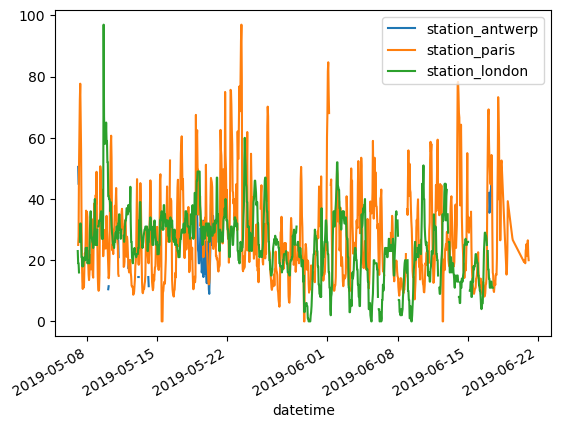

In [167]:
air_quality.plot()

With a __DataFrame,__ pandas creates by default one line plot for each of the columns with numeric data.

I want to plot only the columns of the data table with the data from Paris.

<Axes: xlabel='datetime'>

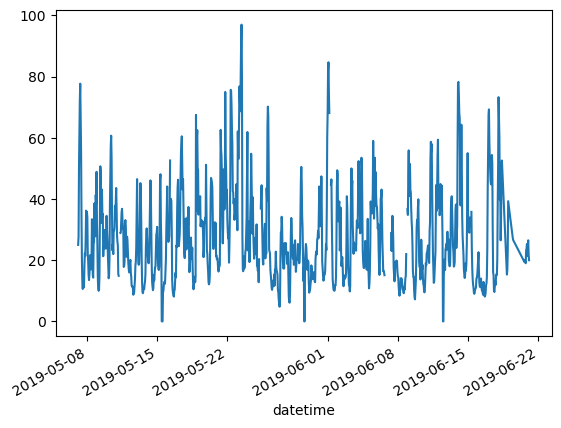

In [168]:
air_quality["station_paris"].plot()

We want to visually compare the NO2 values measured in London versus Paris,

<Axes: xlabel='station_london', ylabel='station_paris'>

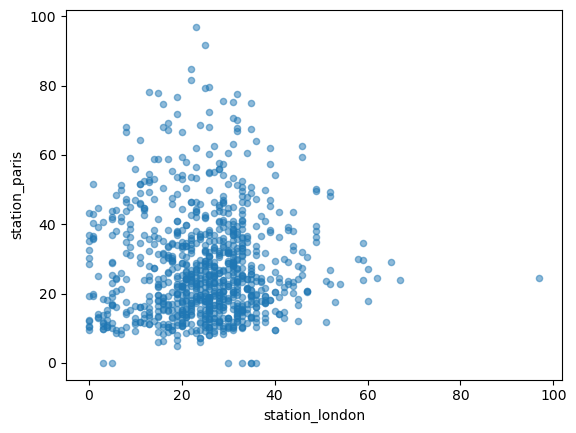

In [169]:
air_quality.plot.scatter(x="station_london", y="station_paris", alpha=0.5)

Apart from the default __line plot__ when using the __plot__ function, a number of alternatives are available to plot data. Lets use some standard Python to get an overview of the available plot methods:

In [170]:
[
    method_name
    for method_name in dir(air_quality.plot)
    if not method_name.startswith("-")
]

['__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accessors',
 '_all_kinds',
 '_common_kinds',
 '_constructor',
 '_dataframe_kinds',
 '_dir_additions',
 '_dir_deletions',
 '_get_call_args',
 '_hidden_attrs',
 '_kind_aliases',
 '_parent',
 '_reset_cache',
 '_series_kinds',
 'area',
 'bar',
 'barh',
 'box',
 'density',
 'hexbin',
 'hist',
 'kde',
 'line',
 'pie',
 'scatter']

One of the options is __DataFrame.plot.box()__, which refers to a __boxplot__. The __box__ method is applicable on the air quality example data:

<Axes: >

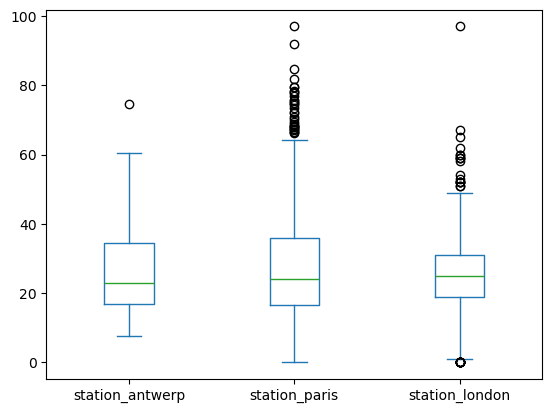

In [171]:
air_quality.plot.box()

We want each of the columns in a seperate subplot.

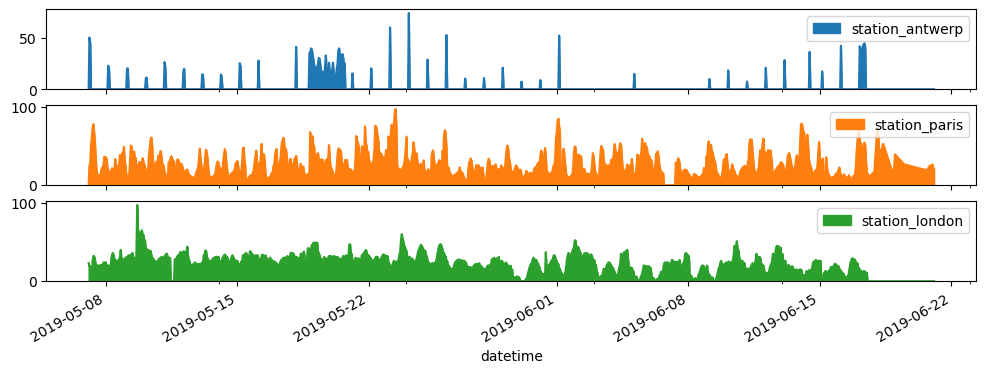

In [172]:
axs = air_quality.plot.area(figsize=(12, 4), subplots=True)

Separate subplots for each of the data columns are supported by the__subplots__ argument of the __plot__ functions.

We want to further customize, extend or save the resulting plot.

<Axes: xlabel='datetime'>

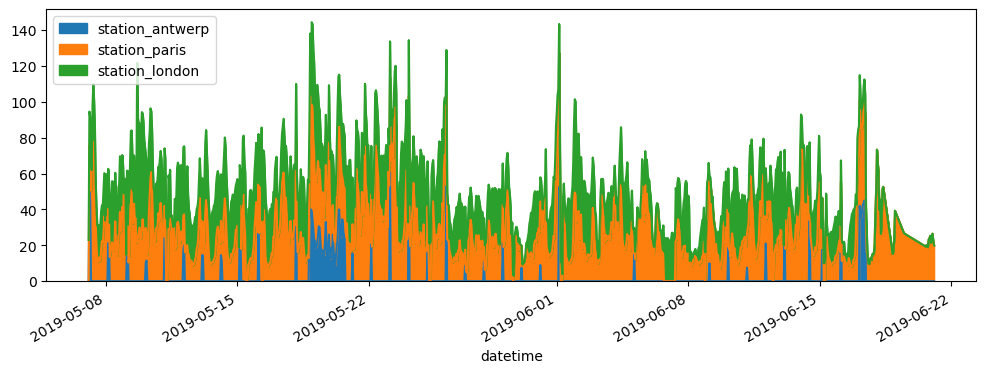

In [173]:
fig, axs = plt.subplots(figsize=(12, 4))
air_quality.plot.area(ax=axs)

Each of the plot objects created by pandas is a _matplolib_ object. As Matplotlib provides plenty of options to customize plots, making the link between pandas and Matplotlib explicit enables all the power of matplotlib to the plot.

In [174]:
axs.set_ylabel("NO$_2$ concentration")

Text(4.444444444444452, 0.5, 'NO$_2$ concentration')

__How to create new columns derived from existing columns?__

We want to express the NO2 concentration of the station in London in mg/m3

In [175]:
air_quality["london_mg_per_cubic"] = air_quality["station_london"] * 1.882
air_quality.head()

,station_antwerp,station_paris,station_london,london_mg_per_cubic
datetime,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286
2019-05-07 03:00:00,50.5,25.0,19.0,35.758
2019-05-07 04:00:00,45.0,27.7,19.0,35.758
2019-05-07 05:00:00,NaN,50.4,16.0,30.112
2019-05-07 06:00:00,NaN,61.9,NaN,NaN


To create a new column, use the [] brackets with the new column name at the left side of the assignment.

We want to check the ratio of the values in Paris versus Antwerp and save the result in a new column

In [176]:
air_quality["ratio_paris_antwerp"] = (
    air_quality["station_paris"] / air_quality["station_antwerp"]
)
air_quality.head()

,station_antwerp,station_paris,station_london,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


The calculation is again element-wise, so the / is applied _for the values in each row. Also other mathematical operators (+,-,\*,/) or logical operators (<,>, =,...) work element wise.

We want to rename the data columns to the corresponding station identifiers used by openAQ

The _rename_ function can be used for both row labels and column labels. Provide a dictionary with the keys the current names and the values the new names to update the corresponding names.
The mapping should not be retricted to fixed names only, but can be a mapping function as well. For example, converting the column names to lowercase letters can be done using a function as well:

In [177]:
air_quality_renamed = air_quality.rename(
    columns={
        "station_antwerp": "BETR801",
        "station_paris": "FR04014",
        "station_london": "London Westminister"
    }
)
air_quality_renamed.head()

,BETR801,FR04014,London Westminister,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


This tutorial uses the Titanic data set, stored as CSV.

In [178]:
titanic = pd.read_csv("C:/Users/Owner/anaconda3/envs/tflowenv/Titanic-Dataset.csv")

In [179]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


__Calculating summary statistics__

__Aggregating statistics__

Lets compute the average age of the Titanic passengers

In [180]:
titanic["Age"].mean()

29.69911764705882

Different statistics are available and can be applied to columns with numerical data. Operations in general exclude missing data and operate across rows by default.

Lets compute the median age and ticket fare price of the Titanic passengers

In [181]:
titanic[["Age", "Fare"]].median()

Age     28.0000
Fare    14.4542
dtype: float64

The statistic applied to multiple columns of a __DataFrame__ is calculated for each numeric column.

The aggregating statistic can be calculated for multiple columns at the same time.

In [182]:
titanic[["Age", "Fare"]].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


Instead of the predefined statistics, specific combinations of aggregating statistics for given columns can be defined using the _DataFrame.agg()_ method:

In [183]:
titanic.agg(
    {
        "Age": ["min", "max", "median", "skew"],
        "Fare": ["min", "max", "median", "mean"],
    }
)

,Age,Fare
min,0.420000,0.000000
max,80.000000,512.329200
median,28.000000,14.454200
skew,0.389108,NaN
mean,NaN,32.204208


__Aggregating statistics grouped by category__

Lets compute the average age for male versus female Titanic passengers

In [184]:
titanic[["Sex", "Age"]].groupby("Sex").mean()

,Age
Sex,
female,27.915709
male,30.726645


As our interest is the average age for each gender, a subselection on these two columns is made first: __titanic[["Sex", "Age"]]__. Next, the _groupby()_ method is applied on the __Sex__ column to make a group per category. The average age for each gender is calculated and returned.

Calculating a given statistic (e.g. __mean__ age) for each category in a column (e.g. male/female in the __Sex__ column) is common pattern. The __groupby__ method is used to support this type of operations. More general, this fits in the more general __split-apply-combine__ pattern:
- __Split__ the data into groups
- __Apply__ a function to each group independently
- __Combine__ the results into a data structure
The apply and combine steps are typically done together in pandas.

It does not make much sense to get the average value of the __Pclass__. If we are only interested in the average age for each gender, the selection of columns (rectangular brackets [] as usual) is supported on the grouped data as well:

In [185]:
titanic.groupby("Sex")["Age"].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

Lets compute the mean ticket fare price for each of the sex and cabin combinations

In [186]:
titanic.groupby(["Sex", "Pclass"])["Fare"].mean()

Sex     Pclass
female  1         106.125798
        2          21.970121
        3          16.118810
male    1          67.226127
        2          19.741782
        3          12.661633
Name: Fare, dtype: float64

Grouping can be done by multiple columns at the same time. Provide the column names as a list to the _groupby()_ method.

__Counting number of records by category__

We want to compute the number of passengers in each of the cabin classes

In [187]:
titanic["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

The __value_counts()__ method counts the number of records for each category in a column.

The function is a shortcut, as it is actually a groupby operation in combination with counting of the number of records within each group:

In [188]:
titanic.groupby("Pclass")["Pclass"].count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

The air-quality data is provided in a so-called _long format_ data representation with each observation on a separate column of the data table. The long/narrow format is also known as the __tidy data format__

In [189]:
air_quality = pd.read_csv("C:/Users/Owner/anaconda3/envs/tflowenv/air_quality_long.csv", index_col="date.utc", parse_dates=True
    )
air_quality.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-18 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.0,µg/m³
2019-06-17 08:00:00+00:00,Antwerpen,BE,BETR801,pm25,6.5,µg/m³
2019-06-17 07:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.5,µg/m³
2019-06-17 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,16.0,µg/m³
2019-06-17 05:00:00+00:00,Antwerpen,BE,BETR801,pm25,7.5,µg/m³


__Reshaping the layout of tables__

__Sorting table rows__

We will sort the Titanic data according to the age of the passengers.

In [190]:
titanic.sort_values(by="Age").head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S


I want to sort the Titanic data according to the cabin class and age in descending order.

In [191]:
titanic.sort_values(by=['Pclass', 'Age'], ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S


With __Series.sort_values()__, the rows in the table are sorted according to the defined column(s).

We will use a small subset of the air quality data set. We focus on NO2 data and only use the first two measurements of each location (i.e. the head of each group). The subset of data will be called __no2_subset__

In [192]:
# filter for no2 data only
no2 = air_quality[air_quality["parameter"] == "no2"]

In [193]:
# use 2 measurements (head) for each location (groupby)
no2_subset = no2.sort_index().groupby(["location"]).head(2)

In [194]:
no2_subset

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-04-09 01:00:00+00:00,Antwerpen,BE,BETR801,no2,22.5,µg/m³
2019-04-09 01:00:00+00:00,Paris,FR,FR04014,no2,24.4,µg/m³
2019-04-09 02:00:00+00:00,London,GB,London Westminster,no2,67.0,µg/m³
2019-04-09 02:00:00+00:00,Antwerpen,BE,BETR801,no2,53.5,µg/m³
2019-04-09 02:00:00+00:00,Paris,FR,FR04014,no2,27.4,µg/m³
2019-04-09 03:00:00+00:00,London,GB,London Westminster,no2,67.0,µg/m³


We want the values for the three stations as separate columns next to each other

In [195]:
no2_subset.pivot(columns="location", values="value")

location,BETR801,FR04014,London Westminster
date.utc,,,
2019-04-09 01:00:00+00:00,22.5,24.4,NaN
2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2019-04-09 03:00:00+00:00,NaN,NaN,67.0


The __pivot()__ function is purely reshaping of the data: a single value for each index/column combination is required.

In [196]:
no2.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-21 00:00:00+00:00,Paris,FR,FR04014,no2,20.0,µg/m³
2019-06-20 23:00:00+00:00,Paris,FR,FR04014,no2,21.8,µg/m³
2019-06-20 22:00:00+00:00,Paris,FR,FR04014,no2,26.5,µg/m³
2019-06-20 21:00:00+00:00,Paris,FR,FR04014,no2,24.9,µg/m³
2019-06-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.4,µg/m³


<Axes: xlabel='date.utc'>

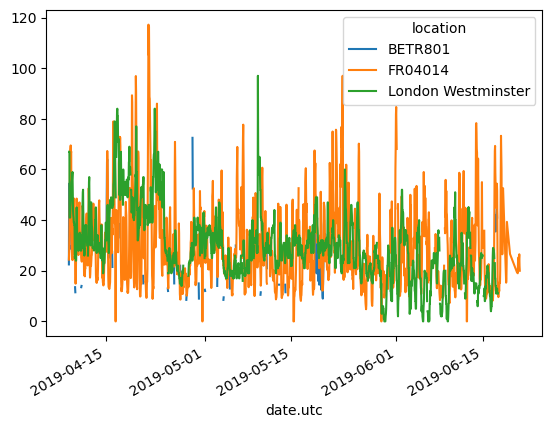

In [197]:
no2.pivot(columns="location", values="value").plot()

When the __index__ parameter is not defined, the existing index (row labels) is used.

__Pivot table__

I want the mean concentrations for 𝑁𝑂2 and 𝑃𝑀2.5 in each of the stations in table form

In [198]:
air_quality.pivot_table(
    values="value", index="location", columns="parameter", aggfunc="mean"
)

parameter,no2,pm25
location,,
BETR801,26.950920,23.169492
FR04014,29.374284,NaN
London Westminster,29.740050,13.443568


In the case of __pivot()__, the data is only rearranged. When multiple values need to be aggregated(in this specific case, the values on different time steps) __pivot_table()__ can be used, providing an aggregation function(e.g. mean) on how to combine these values.
Pivot table is a well known concept in spreadsheet software. When interested in summary columns for each variable separately as well, put the __margin__ parameter to __True__:

In [199]:
air_quality.pivot_table(
    values="value",
    index="location",
    columns="parameter",
    aggfunc="mean",
    margins=True,
)

parameter,no2,pm25,All
location,,,
BETR801,26.950920,23.169492,24.982353
FR04014,29.374284,NaN,29.374284
London Westminster,29.740050,13.443568,21.491708
All,29.430316,14.386849,24.222743


In case you are wondering, __pivot_table__ is indeed directly linked to __groupby()__. The same result can be derived by grouping on both __parameter__ and __location__:

__Wide to long format__

Starting again from the wide format table created in the previous section:

In [ ]:
no2_pivoted = no2.pivot(columns="location", values="value").reset_index()

In [201]:
no2_pivoted.head()

location,date.utc,BETR801,FR04014,London Westminster
0,2019-04-09 01:00:00+00:00,22.5,24.4,NaN
1,2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2,2019-04-09 03:00:00+00:00,54.5,34.2,67.0
3,2019-04-09 04:00:00+00:00,34.5,48.5,41.0
4,2019-04-09 05:00:00+00:00,46.5,59.5,41.0


We want to collect all air quality NO2 measurements in a single column (long format)

In [ ]:
no_2 = no2_pivoted.melt(id_vars="date.utc")

In [202]:
no_2.head()

,date.utc,id_location,NO_2
0,2019-04-09 01:00:00+00:00,BETR801,22.5
1,2019-04-09 02:00:00+00:00,BETR801,53.5
2,2019-04-09 03:00:00+00:00,BETR801,54.5
3,2019-04-09 04:00:00+00:00,BETR801,34.5
4,2019-04-09 05:00:00+00:00,BETR801,46.5


The __pandas.melt()__ method on a __DataFrame__ converts the data table from wide format to long format. The column headers become the variable names in a newly created column.
The solution is the short version on how to apply __pandas.melt()__. The method will _melt_ all columns NOT mentioned in __id_vars__ together into two columns: A column with the column header names and a column with the values itself. The latter column gets by default the name __value__.
The __pandas.melt()__ method can be defined in more detail:

In [ ]:
no_2 = no2_pivoted.melt(
    id_vars = "date.utc",
    value_vars=["BETR801", "FR04014", "London Westminster"],
    value_name="NO_2",
    var_name="id_location",
)

In [203]:
no_2.head()

,date.utc,id_location,NO_2
0,2019-04-09 01:00:00+00:00,BETR801,22.5
1,2019-04-09 02:00:00+00:00,BETR801,53.5
2,2019-04-09 03:00:00+00:00,BETR801,54.5
3,2019-04-09 04:00:00+00:00,BETR801,34.5
4,2019-04-09 05:00:00+00:00,BETR801,46.5


The result in the same, but in more detail defined:
- __value_vars__ defines explicitly which columns to _melt_ together
- __value_name__ provides a custom column name for the column collecting the column header names. Otherwise it takes the index name or a default __variable__.

Hence, the arguments __value_name__ and __var_name__ are just user-defined names for the two generated columns. The columns to melt are defined by __id_vars__ and __value_vars__.
- Sorting by one or more columns is supported by __sort_values__
- The __pivot__ function is purely restructuring of the data, __pivot_table__ supports aggregations
- The reverse of __pivot__ (long to wide format) is __melt__ (wide to long format)

For this exerise, air quality data about NO2 is used, made available by _openaq_ and downloaded using the _py-openaq package_.

The __air_quality_no2_long.csv__ data set provides NO2 values for the measurement stations _FR4014, BETR801 and London Westminster_ in respectively Paris, Antwerp and London.

In [ ]:
air_quality_no2 = pd.read_csv("C:/Users/Owner/anaconda3/envs/tflowenv/air_quality_no2_long.csv", parse_dates=True)

In [ ]:
air_quality_no2 = air_quality_no2[["date.utc", "location", "parameter", "value"]]

In [204]:
air_quality_no2.head()

,date.utc,location,parameter,value
0,2019-06-21 00:00:00+00:00,FR04014,no2,20.0
1,2019-06-20 23:00:00+00:00,FR04014,no2,21.8
2,2019-06-20 22:00:00+00:00,FR04014,no2,26.5
3,2019-06-20 21:00:00+00:00,FR04014,no2,24.9
4,2019-06-20 20:00:00+00:00,FR04014,no2,21.4


For this exercise, air quality data about Particulate matter less than 2.5 micrometers is used, made available by openaq and downloaded using the py-openaq package.

The __air_quality_pm25_long.csv__ data set provides PM25 values for the measurement stations _FR04014, BETR801 and London Westminster_ in respectively Paris, Antwerp and London.

In [ ]:
air_quality_pm25 = pd.read_csv("C:/Users/Owner/anaconda3/envs/tflowenv/air_quality_pm25_long.csv", parse_dates=True)

In [205]:
air_quality_pm25 = air_quality_pm25[["date.utc", "location", "parameter", "value"]]

In [206]:
air_quality_pm25.head()

,date.utc,location,parameter,value
0,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0
1,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5
2,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5
3,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0
4,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5


__How to combine data from multiple tables?__

__Concatenating objects__

We want to combine the measurements of NO2 and PM25, two tables with a similar structure, in a single table

In [ ]:
air_quality = pd.concat([air_quality_pm25, air_quality_no2], axis=0)

In [207]:
air_quality.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-18 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.0,µg/m³
2019-06-17 08:00:00+00:00,Antwerpen,BE,BETR801,pm25,6.5,µg/m³
2019-06-17 07:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.5,µg/m³
2019-06-17 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,16.0,µg/m³
2019-06-17 05:00:00+00:00,Antwerpen,BE,BETR801,pm25,7.5,µg/m³


The __concat()__ function performs concatenation operations of multiple tables along one of the axis (row-wise or column-wise).
By default concatenation is along axis 0, so the resulting table combines the rows of the input tables. Let's check the shape of the original and the concatenated tables to verify the operation:

In [208]:
print('Shape of the ''air_quality_pm25'' table: ', air_quality_pm25.shape)

Shape of the air_quality_pm25 table:  (1110, 4)


In [209]:
print('Shape of the ''air_quality_no2'' table: ', air_quality_no2.shape)

Shape of the air_quality_no2 table:  (2068, 4)


In [210]:
print('Shape of the resulting ''air_quality'' table: ', air_quality.shape)

Shape of the resulting air_quality table:  (5272, 6)


Hence, the resulting table has 3178 = 1110 + 2068 rows.

The __axis__ argument will return in a number of pandas methods that can be applied __along an axis__. A __DataFrame__ has two corresponding axes: the first running vertically downwards across rows(axis 0), and the second running horizontally across columns (axis 1). Most operations like concatenation or summary statistics are by default across rows (axis 0), but can be applied across columns as well.

Sorting the table on the datetime information illustrates also the combination of both tables, with the __parameter__ column defining the origin of the table (either __no2__ from table __air_quality_no2__ or __pm25__ from table __air_quality_pm25__):

In [ ]:
air_quality = air_quality.sort_values("date.utc")

In [211]:
air_quality.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-18 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.0,µg/m³
2019-06-17 08:00:00+00:00,Antwerpen,BE,BETR801,pm25,6.5,µg/m³
2019-06-17 07:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.5,µg/m³
2019-06-17 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,16.0,µg/m³
2019-06-17 05:00:00+00:00,Antwerpen,BE,BETR801,pm25,7.5,µg/m³


In this specific example, the __parameter__ column provided by the data ensures that each of the original tables can be identified. This is not always the case. the __concat__ function provides a convenient solution with the __keys__ argument, adding an additional (hierarchical) row index. For example:

In [ ]:
air_quality_ = pd.concat([air_quality_pm25, air_quality_no2], keys=["PM25", "NO2"])

In [212]:
air_quality_.head()

date.utc location parameter  value
PM25 0  2019-06-18 06:00:00+00:00  BETR801      pm25   18.0
     1  2019-06-17 08:00:00+00:00  BETR801      pm25    6.5
     2  2019-06-17 07:00:00+00:00  BETR801      pm25   18.5
     3  2019-06-17 06:00:00+00:00  BETR801      pm25   16.0
     4  2019-06-17 05:00:00+00:00  BETR801      pm25    7.5

__Join tables using a common identifier__

Add the station coordinates, provided by the stations metadata table, to the corresponding rows in the measurements table.

In [ ]:
stations_coord = pd.read_csv("C:/Users/Owner/anaconda3/envs/tflowenv/air_quality_stations.csv")

In [213]:
stations_coord.head()

,location,coordinates.latitude,coordinates.longitude
0,BELAL01,51.23619,4.38522
1,BELHB23,51.17030,4.34100
2,BELLD01,51.10998,5.00486
3,BELLD02,51.12038,5.02155
4,BELR833,51.32766,4.36226


The stations used in this example (FR04014, BETR801 and London Westminister) are just three entries enlisted in the metadata table. We only want to add the coordinates of these three to the measurements table, each on the corresponding rows of the __air_quality__ table.

In [214]:
air_quality.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-18 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.0,µg/m³
2019-06-17 08:00:00+00:00,Antwerpen,BE,BETR801,pm25,6.5,µg/m³
2019-06-17 07:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.5,µg/m³
2019-06-17 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,16.0,µg/m³
2019-06-17 05:00:00+00:00,Antwerpen,BE,BETR801,pm25,7.5,µg/m³


In [ ]:
air_quality = pd.merge(air_quality, stations_coord, how="left", on="location")

In [215]:
air_quality.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-18 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.0,µg/m³
2019-06-17 08:00:00+00:00,Antwerpen,BE,BETR801,pm25,6.5,µg/m³
2019-06-17 07:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.5,µg/m³
2019-06-17 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,16.0,µg/m³
2019-06-17 05:00:00+00:00,Antwerpen,BE,BETR801,pm25,7.5,µg/m³


Using the ___merge()__ function for each of the rows in the __air_quality__ table, the corresponding coordinates are added from the __air_quality_stations_coord__ table. Both tables have the column __location__ in common which is used as a key to combine the information. By choosing the __left__ join, only the locactions available in the __air_quality__ (left) table, i.e. FR04014, BETR801 and London Westminster, end up in the resulting table. The __merge__ function supports multiple join options similar to database-style operations.

In [ ]:
air_quality_parameters = pd.read_csv("C:/Users/Owner/anaconda3/envs/tflowenv/air_quality_parameters.csv")

In [216]:
air_quality_parameters.head()

,id,description,name
0,bc,Black Carbon,BC
1,co,Carbon Monoxide,CO
2,no2,Nitrogen Dioxide,NO2
3,o3,Ozone,O3
4,pm10,Particulate matter less than 10 micrometers in...,PM10


In [ ]:
air_quality = pd.merge(air_quality, air_quality_parameters, how='left', left_on='parameter', right_on='id')

In [ ]:
air_quality.head()

Compared to the previous example, there is no common column name. However, the __parameter__ column in the __air_quality__ table and the __id__ column in the __air_quality_parameters_name__ both provide the measured variable in a common format. The __left_on__ and __right_on__ arguments are used here (instead of just on) to make the link between the two tables. Pandas supports also inner, outer, and right joins. Multiple tables can be concatenated both column-wise and row-wise using the concat function. For database-like merging/joining of tables, use the merge function.

For this exercise, air quality data about NO2 and Particulate matter less than 2.5 micrometers is used. The __air_quality_no2_long.csv__ data set provides NO2 values for the measurement stations _FR04014, BETR801 and London Westminster_ in respectively Paris, Antwerp and London

In [ ]:
air_quality = pd.read_csv("C:/Users/Owner/anaconda3/envs/tflowenv/air_quality_no2_long.csv")

In [ ]:
air_quality = air_quality.rename(columns={"date.utc": "datetime"})

In [217]:
air_quality.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-18 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.0,µg/m³
2019-06-17 08:00:00+00:00,Antwerpen,BE,BETR801,pm25,6.5,µg/m³
2019-06-17 07:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.5,µg/m³
2019-06-17 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,16.0,µg/m³
2019-06-17 05:00:00+00:00,Antwerpen,BE,BETR801,pm25,7.5,µg/m³


In [218]:
air_quality.city.unique()

array(['Antwerpen', 'London', 'Paris'], dtype=object)